In [1]:
%matplotlib inline 

from math import sin
import graphviz
from ipywidgets import interactive
from IPython.display import Image
import matplotlib.pylab as plt

soldati = lambda n: list(range(1, n + 1))

def gioca(soldati):
    V = list(soldati)
    M = []
    m = 1
    while len(V) > 1:
        M.append(V[m])
        del V[m]
        m = m + 1
        if m >= len(V): m = m - len(V)
    return M

def giuseppe(N, size = 400):
    
    G = graphviz.Digraph(engine = 'neato', format = 'png', graph_attr = {'size': '8!', 'ratio': 'compress', 'dpi': '75'})

    for i in range(N):
        G.node(str(i), label=str(i+1))
        G.edge(str(i), str((i +1)%N))

    seq = list(gioca(soldati(N)))
    images = [Image(G.pipe(), width = size)]
    for i in seq: 
        G.node(str(i-1), color = 'red', style = 'filled')
        images.append(Image(G.pipe(), width = size))

    def red(s = 0):
        display(images[s])
    
    iw = interactive(red, s = (0, len(images) - 1))
    iw.children[-1].layout.height = f'{size + 60}px'

    return iw

def disegna(N):
    x = soldati(N)
    y = [sopravvissuto(n) for n in x]
    plt.subplots(figsize=(16, 8))
    i = 1
    while i <= x[-1]:
        plt.axvline(i, color = 'r', lw = .5)
        i *= 2
    plt.plot(x,y, '.-')

In [2]:
DEBUG = False

from IPython.core.ultratb import AutoFormattedTB

itb = AutoFormattedTB(mode = 'Plain', tb_offset = 1)

def custom_exc(shell, etype, evalue, tb, tb_offset=None):

    if DEBUG: shell.showtraceback((etype, evalue, tb), tb_offset=tb_offset)
    stb = itb.structured_traceback(etype, evalue, tb)
    print(itb.stb2text(stb[-1]))

get_ipython().set_custom_exc((Exception,), custom_exc)

<h1 class="text-center">Il metodo scientifico e la</h1>
<h1 class="text-center">scrittura di programmi informatici</h1>

&nbsp;

&nbsp;

<div style="text-align: right">Massimo Santini</div>

<center><img src="img/copertine/Galileo.jpg"></center>

<h1 class="text-center">metodo scientifico ➡ programmazione</h1>

<h1 class="text-center">programmazione ➡ metodo scientifico</h1>

<center><img src="img/copertine/Popper.jpg"></center>

<center><img src="img/pirates.jpg"></center>

<center><img src="img/copertine/Kuhn.png"></center>

<center><img src="img/copertine/Feyerabend-Lakatos.jpg"></center>

<h1 class="text-center">Programmare…</h1>

&nbsp;

<center><img src="img/Python.jpg"></center>

## … in dieci minuti

* Linguaggio *formale* (**sintassi**)

* Esecuzione *automatica* (**semantica**)

## Espressioni (atomi)

In [3]:
3 + 4 * 2

11

In [4]:
4 < 2

False

In [5]:
5 == 5

True

In [6]:
sin(3)

0.1411200080598672

In [7]:
print(3 + 2)

5


In [8]:
x + 3

NameError: name 'x' is not defined



In [9]:
x = 3

In [10]:
x + 3

6

In [11]:
x = x + 1

In [12]:
x

4

In [13]:
v = [10, 30, 60, 50]
v

[10, 30, 60, 50]

$\vec{\mathbf{v}} = (v_0, v_1, \ldots, v_{n-1})$

In [14]:
v[2]

60

In [15]:
del v[3]

In [16]:
v

[10, 30, 60]

## Strutture di controllo

In [17]:
x = 3
y = 2
x + y

5

$$
x = 
\begin{cases}
7 \quad\text{se $y = 2$}\\
3 \quad\text{altrimenti.}
\end{cases}
$$

In [18]:
if y == 2:
    x = 7
else:
    x = 3
x

7

In [19]:
i = 1
while i <= 10:
    print(3 * i)
    i = i + 1

3
6
9
12
15
18
21
24
27
30


<h1 class="text-center">E il metodo scientifico?</h1>

<center><img src="img/metodo/1.png"></center>

<center><img src="img/metodo/2.png"></center>

<center><img src="img/metodo/3.png"></center>

<center><img src="img/metodo/4.png"></center>

<center><img src="img/metodo/5.png"></center>

<center><img src="img/metodo/6.png"></center>

# Che c'entra la programmazione?

Citando Frederic Brooks, in *The Mythical Man-Month* (1975)…

<center><img src="img/joy1.png"></center>

<center><img src="img/joy2.png"></center>

<h1 class="text-center">Il problema di Yosef ben Matityahu</h1>

&nbsp;

<center><img src="img/Giuseppe.jpg"></center>

In [20]:
giuseppe(11)

interactive(children=(IntSlider(value=0, description='s', max=10), Output(layout=Layout(height='460px'))), _do…

In [21]:
giuseppe(41, 600)

interactive(children=(IntSlider(value=0, description='s', max=40), Output(layout=Layout(height='660px'))), _do…

# Come salvarsi la vita?

In [22]:
vivi = soldati(5)
vivi

[1, 2, 3, 4, 5]

In [23]:
del vivi[1]
vivi

[1, 3, 4, 5]

In [24]:
vivi = soldati(5)
i = 1
while i < 5:
    del vivi[i]
    i = i + 2

In [25]:
vivi

[1, 3, 4]

<h1 class="text-center">And Now for Something Completely Different</h1>

&nbsp;

<center><img src="img/bug.jpg"></center>

In [26]:
vivi = soldati(6)
i = 1
while i < 6:
    del vivi[i]
    i = i + 2

IndexError: list assignment index out of range



In [27]:
N = 6
vivi = soldati(N)
i = 1
while i < N:
    print(i, vivi)
    del vivi[i]
    i = i + 2

1 [1, 2, 3, 4, 5, 6]
3 [1, 3, 4, 5, 6]
5 [1, 3, 4, 6]
IndexError: list assignment index out of range



In [28]:
vivi = soldati(N)
i = 1
while i < N:
    del vivi[i]
    i = i + 1

IndexError: list assignment index out of range



In [29]:
vivi

[1, 3, 5]

In [30]:
vivi = soldati(N)
i = 1
while i < len(vivi):
    del vivi[i]
    i = i + 1

In [31]:
vivi

[1, 3, 5]

In [32]:
i

4

In [33]:
vivi + vivi

[1, 3, 5, 1, 3, 5]

In [34]:
vivi = soldati(N)
i = 1
while i < len(vivi):
    del vivi[i]
    i = i + 1
    if i >= len(vivi): i = i - len(vivi)

In [35]:
vivi

[]

In [36]:
vivi = soldati(N)
i = 1
while len(vivi) > 1:
    del vivi[i]
    i = i + 1
    if i >= len(vivi): i = i - len(vivi)

In [37]:
vivi

[5]

## Una nuova funzione…

In [38]:
def sopravvissuto(N):
    vivi = soldati(N)
    i = 1
    while len(vivi) > 1:
        del vivi[i]
        i = i + 1
        if i >= len(vivi): i = i - len(vivi)
    return vivi[0]

In [39]:
sopravvissuto(6)

5

In [40]:
N = 1
while N < 12:
    print(N, sopravvissuto(N))
    N = N + 1

1 1
2 1
3 3
4 1
5 3
6 5
7 7
8 1
9 3
10 5
11 7


In [41]:
giuseppe(16)

interactive(children=(IntSlider(value=0, description='s', max=15), Output(layout=Layout(height='460px'))), _do…

In [42]:
N = 1
while N <= 1024:
    print(sopravvissuto(N))
    N = N * 2

1
1
1
1
1
1
1
1
1
1
1


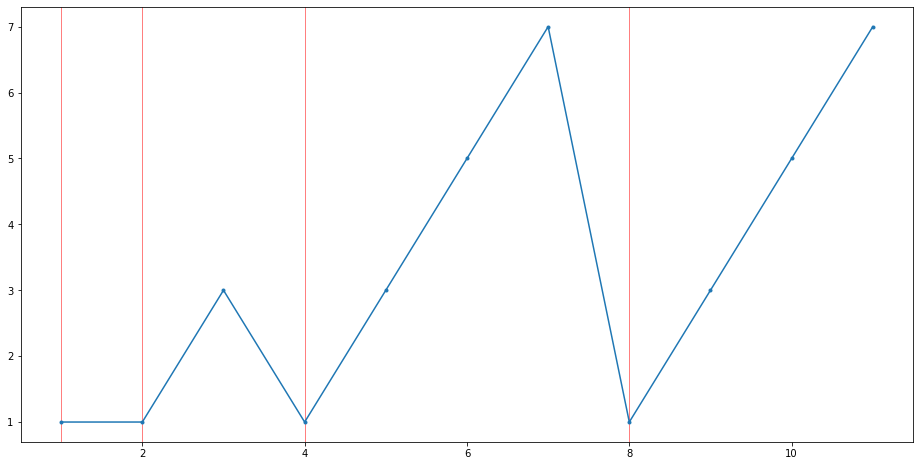

In [43]:
disegna(11)

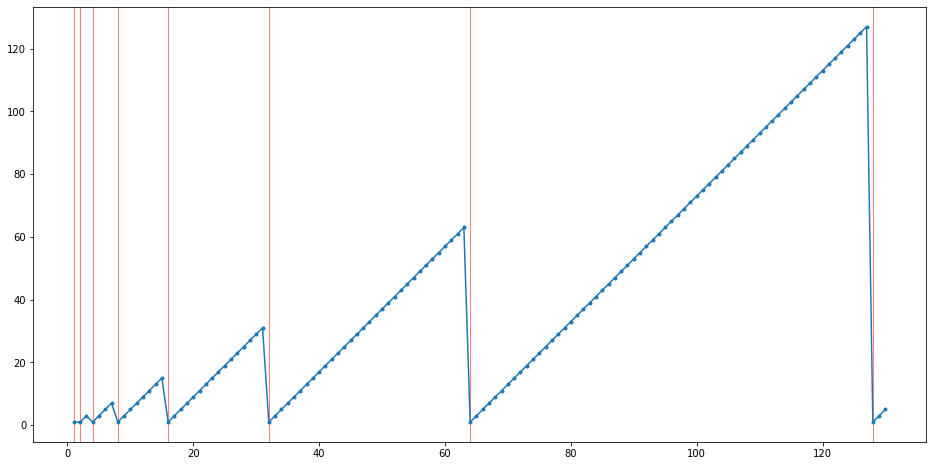

In [44]:
disegna(130)

## Una dipendenza lineare?

Se $n$ è il più grande intero tale che

$$N = 2^n + \ell$$

(ossia $\ell < 2^n$), dal grafico formuliamo l'**ipotesi** che

$$\text{sopravvisuto}(N) = m \ell + q$$

restano da determinare $m$ e $q$…

In [45]:
N = 1
due_alla_n = 1
while N <= 16:
    l = N - due_alla_n
    print(l, sopravvissuto(N))
    N = N + 1
    if 2 * due_alla_n <= N: due_alla_n = due_alla_n * 2


0 1
0 1
1 3
0 1
1 3
2 5
3 7
0 1
1 3
2 5
3 7
4 9
5 11
6 13
7 15
0 1


# Giuseppe, il diciannovesimo soldato

Possiamo concludere che $$\text{sopravvisuto}(2^n + \ell)= 2 \ell + 1.$$

Quando $N = 41 = 32 + 9 = 2^6 + 9$, per sopravvivere bisogna quindi essere al posto 

$$2 \times 9 + 1 = 19$$
    


<center><img src="img/MontyPython.jpg"></center>